In [1]:
%cd src

/home/romet/projects/ut/automl/src


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

from dataloader import load_data
from visualisation import draw_roc_curve

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
train = load_data()
y = train.target.values

Reading training data...
Original train shape:  (200000, 202)
Frequency encoding...
shape returned by frequency_encoding function (200000, 200)
Scaling data...
target data type is int64
shape returned by load_data function (200000, 402)


In [21]:
oof_predictions = {
    'LogisticRegression': '../kfolds/LogisticRegression__folds5__0.8663441978741692.csv',
    'QuadraticDiscriminantAnalysis': '../kfolds/QDA__folds5__0.7741776454780587.csv',
    'Ridge': '../kfolds/Ridge__folds5__0.8650466487377242.csv',
    'BernoulliNB': '../kfolds/BernoulliNB__folds5__0.7937801380278249.csv',
    'RandomForest': '../kfolds/RandomForest__folds5__0.8483128955541002.csv',
    'ExtraTrees': '../kfolds/ExtraTrees__folds5__0.8573099674487031.csv',
    'NaiveBayes': '../kfolds/NaiveBayes__folds5__0.8612345299629462.csv',
    'GradiengBoosting': '../kfolds/GradientBoosting__folds5__0.8454823571257848.csv',
    'SupportVectorMachines': '../kfolds/SVM__folds5__0.8704527673434534.csv',
    'KNeighbors': '../kfolds/KNeighbors__folds5__0.5462952374434299.csv',
    'MLP'
    'CatBoost': '../kfolds/CatBoost__folds5__0.9020671852744844.csv',
    'XGBoost': '../kfolds/XGBoost__folds5__0.8644135937992727.csv',
    #'XGBoost Optimized': '../kfolds/XGBoostOptimized__folds5__0.9026087657521092.csv',
    #'XGBoost Autofeat Optimized': '../kfolds/XGBoostAutoFeat__folds5__0.9021793206340705.csv',
    'LightGBM': '../kfolds/LightGBM__folds5__0.8949656737461088.csv',
    #'LightGBM Optimized': '../kfolds/LightGBMOptimized__folds5__0.9067238024867795.csv'
    #'LightGBM AutoFeat': '../kfolds/XGBoostAutoFeat__folds5__0.9021793206340705.csv'
    
}

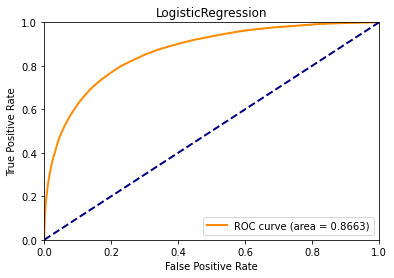

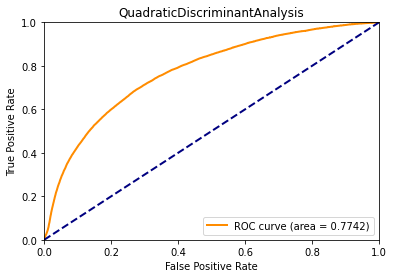

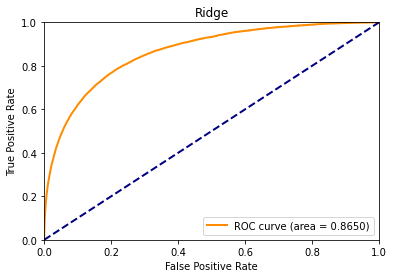

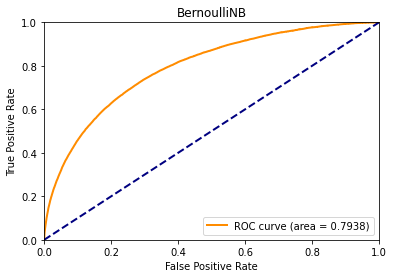

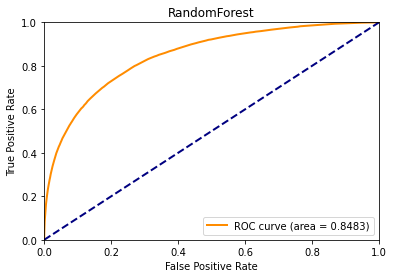

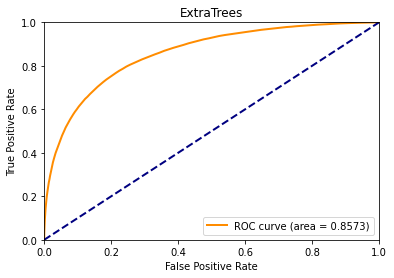

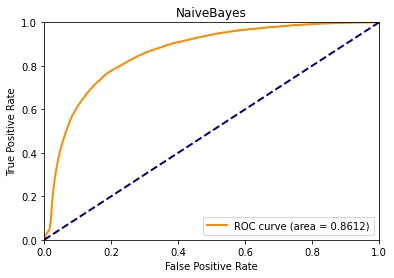

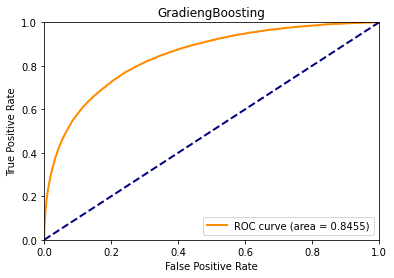

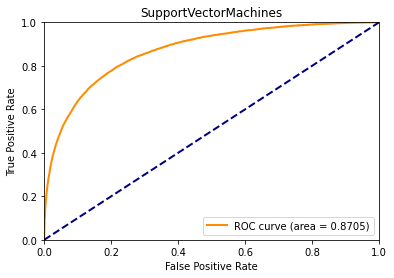

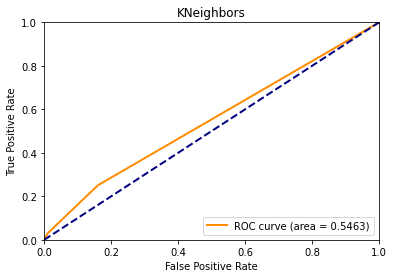

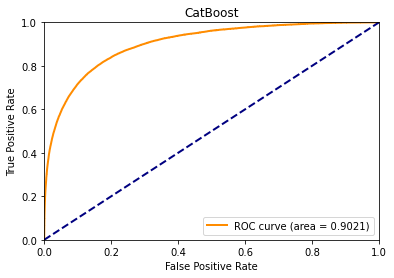

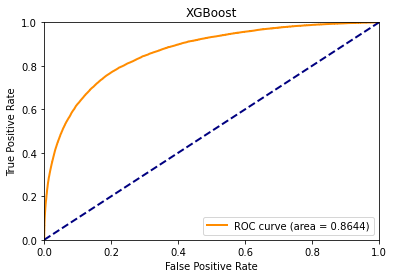

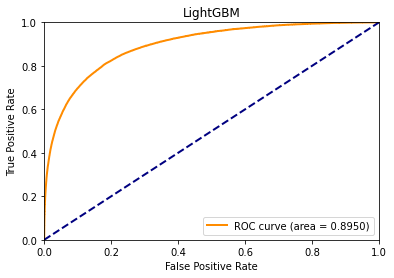

In [22]:
for algo, oof_file in oof_predictions.items():
    result_df = pd.read_csv(oof_file)
    preds = result_df['target'].to_numpy()
    roc_score = roc_auc_score(y, preds)
    fpr, tpr, thresholds = roc_curve(y, preds)
    draw_roc_curve(fpr, tpr, roc_score, algo)
    